In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/personal-loan-modeling/Bank_Personal_Loan_Modelling.csv


**Data Description**
The file Bank_Personal_Loan_Modelling.csv contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

**Attribute Information:**

ID         : Customer ID
Age        : Customer's age in completed years
Experience : No. of years of professional experience
Income     : Annual income of the customer ($ 000)

ZIP Code   : Home Address Zip Code

Family     : Family size of the customer
CCAvg      : Avg. Spending on Credit Card per Month ($ 000)

Education  : Education Level. 1: Undergrad; 2: Graduate; 3: Advanced / Professional

Mortgage   : Value of house mortgage if any. ($000)

Personal Loan : Did this customer accept the personal loan offered in the last campaign?

Securities Account : Does the customer have a securities account with the bank?

CD Account : Does the customer have a certificate of deposit (CD) account with the bank?

Online     : Does the customer use internet banking facilities?

Credit card: Does the customer use a credit card issued by this Bank?

**Objectives:**

Exploratory Data Analysis

Preparing the data to train a model

Training and making predictions using a classification model

Model evaluation

In [2]:
!pip install uszipcode

ERROR: Could not find a version that satisfies the requirement uszipcode (from versions: none)
ERROR: No matching distribution found for uszipcode


In [3]:
# Import libraries


import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

pd.plotting.register_matplotlib_converters()
%matplotlib inline
plt.style.use('seaborn-whitegrid')
pd.set_option('display.max_columns', 500)
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('/kaggle/input/personal-loan-modeling/Bank_Personal_Loan_Modelling.csv')

In [5]:
# Check data head

df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
# Check data summary
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [7]:
# Check Shape of the data
df.shape

(5000, 14)

In [8]:
#Check missing values

df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

There are no any missing values in the dataset.

In [9]:
# Check data info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


We see that a lot of categorical columns are being treated as integer datatypes. We'd like to convert them to categorical for our analysis.

First, we'd like to drop 2 columns that we think are insignificant for the prediction: 'ID' and 'ZIP Code'

In [10]:
# Dropping the two columns from the dataset

df.drop(['ID', 'ZIP Code'], axis=1, inplace=True)

In [11]:
# Check data again
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


So, we can see from the above data that the columns have been dropped. 

In [12]:
# Checking null values again

df.isnull().any()

Age                   False
Experience            False
Income                False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

No missing values found again.

In [13]:
# Separating the columns of the dataset in numeric and categorical attributes.

cols = set(df.columns)
cols_numeric = set(['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage'])
cols_categorical = list(cols - cols_numeric)
cols_categorical

['Personal Loan',
 'CD Account',
 'Online',
 'CreditCard',
 'Education',
 'Securities Account',
 'Family']

In [14]:
for x in cols_categorical:
    df[x] = df[x].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   Family              5000 non-null   category
 4   CCAvg               5000 non-null   float64 
 5   Education           5000 non-null   category
 6   Mortgage            5000 non-null   int64   
 7   Personal Loan       5000 non-null   category
 8   Securities Account  5000 non-null   category
 9   CD Account          5000 non-null   category
 10  Online              5000 non-null   category
 11  CreditCard          5000 non-null   category
dtypes: category(7), float64(1), int64(4)
memory usage: 230.6 KB


In [15]:
#Describing the data again
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0


### Data Visualization

In [16]:
df_num = df.select_dtypes(include='number')
df_cat = df.select_dtypes(include='category')
print(f'Numerical Attributes: {list(df_num.columns)}')
print(f'Categorical Attributes: {list(df_cat.columns)}')

Numerical Attributes: ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
Categorical Attributes: ['Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']


#### Univariate Analysis - Numerical Attributes

In [17]:
# Let's construct a function that shows the summary and density distribution of a numerical attribute:

def summary(x):
    x_min = df[x].min()
    x_max = df[x].max()
    Q1 = df[x].quantile(0.25)
    Q2 = df[x].quantile(0.50)
    Q3 = df[x].quantile(0.75)
    print(f'5 Point Summary of {x.capitalize()} Attribute:\n'
          f'{x.capitalize()}(min) : {x_min}\n'
          f'Q1                    : {Q1}\n'
          f'Q2(Median)            : {Q2}\n'
          f'Q3                    : {Q3}\n'
          f'{x.capitalize()}(max) : {x_max}')

    fig = plt.figure(figsize=(16, 10))
    plt.subplots_adjust(hspace = 0.6)
    sns.set_palette('pastel')
    
    plt.subplot(221)
    ax1 = sns.distplot(df[x], color = 'r')
    plt.title(f'{x.capitalize()} Density Distribution')
    
    plt.subplot(222)
    ax2 = sns.violinplot(x = df[x], palette = 'Accent', split = True)
    plt.title(f'{x.capitalize()} Violinplot')
    
    plt.subplot(223)
    ax2 = sns.boxplot(x=df[x], palette = 'cool', width=0.7, linewidth=0.6)
    plt.title(f'{x.capitalize()} Boxplot')
    
    plt.subplot(224)
    ax3 = sns.kdeplot(df[x], cumulative=True)
    plt.title(f'{x.capitalize()} Cumulative Density Distribution')
    
    plt.show()

5 Point Summary of Age Attribute:
Age(min) : 23
Q1                    : 35.0
Q2(Median)            : 45.0
Q3                    : 55.0
Age(max) : 67


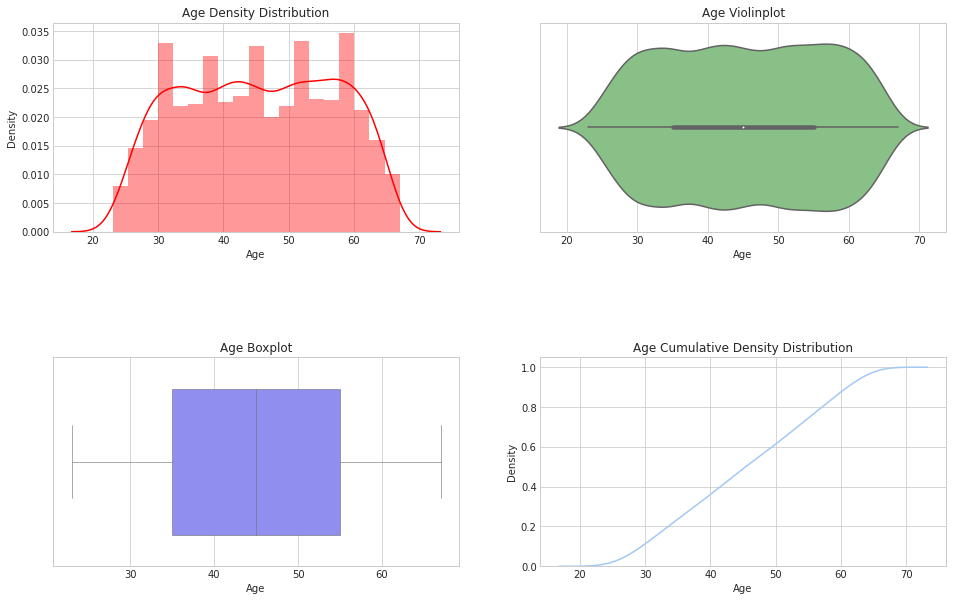

In [18]:
# Summary of 'Age' variable

summary('Age')

**Observation:** We see that the age of the customers are unifromly distributed between teh Min 'age' of 23 and Max 'age' of 67.

5 Point Summary of Experience Attribute:
Experience(min) : -3
Q1                    : 10.0
Q2(Median)            : 20.0
Q3                    : 30.0
Experience(max) : 43


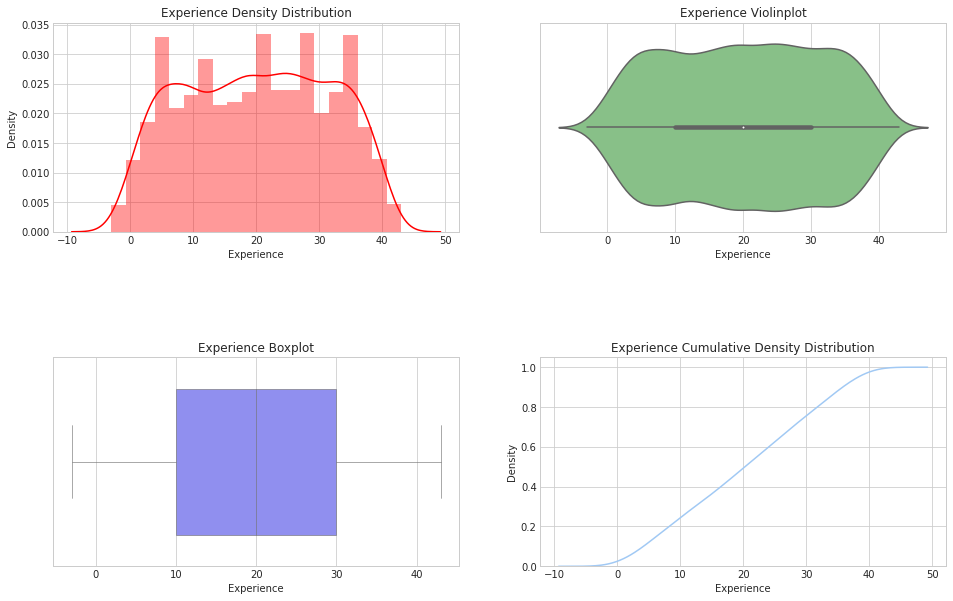

In [19]:
# Summary of 'Experience'
summary('Experience')

**Observation:** We see that the work experience of the customers are uniformly distributed between the Minimum of -3 and Maximum of 43.

5 Point Summary of Income Attribute:
Income(min) : 8
Q1                    : 39.0
Q2(Median)            : 64.0
Q3                    : 98.0
Income(max) : 224


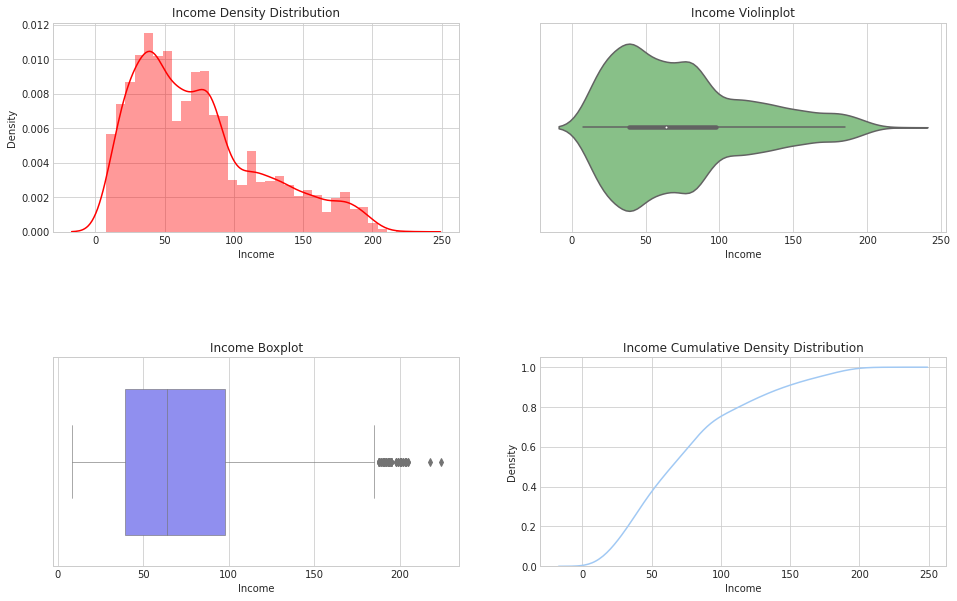

In [20]:
# Check summary of Income
summary('Income')

**Observation:** We see that the income of the customers are skewed to the left with a median income of $64,000.

The Income attribute also has a lot of outlier values.

5 Point Summary of Ccavg Attribute:
Ccavg(min) : 0.0
Q1                    : 0.7
Q2(Median)            : 1.5
Q3                    : 2.5
Ccavg(max) : 10.0


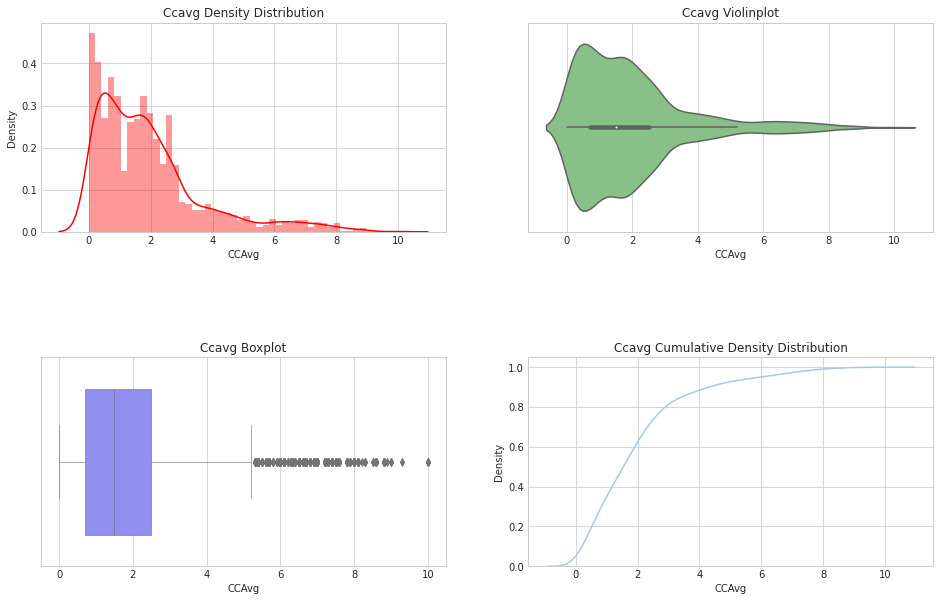

In [21]:
# Check summary of 'CCAvg' as Credit card average
summary('CCAvg')

**Observation:** We see that the Average Monthly Credit Card spending of the customers are skewed heavily to the left, with a lot of outlier values.

5 Point Summary of Mortgage Attribute:
Mortgage(min) : 0
Q1                    : 0.0
Q2(Median)            : 0.0
Q3                    : 101.0
Mortgage(max) : 635


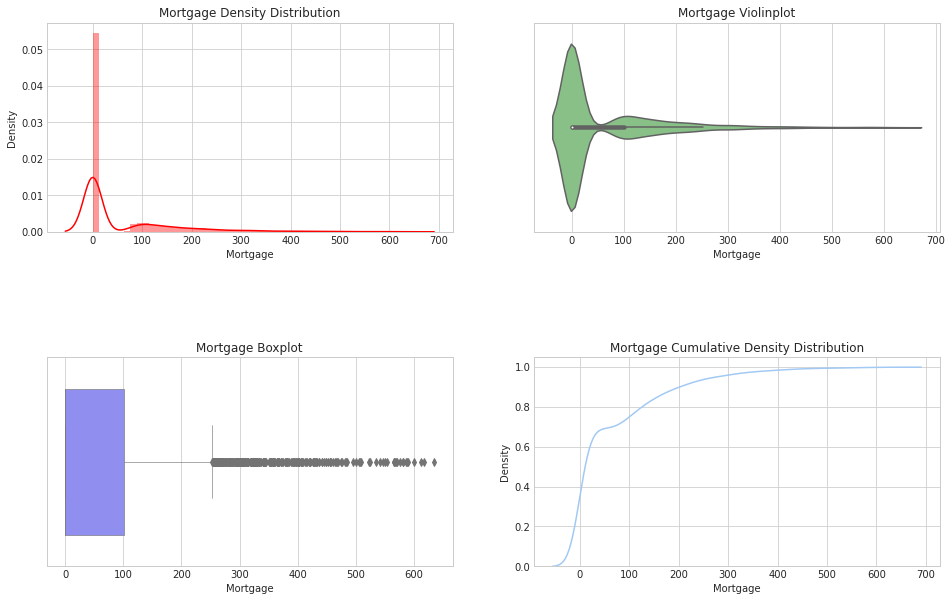

In [22]:
# Check summary of 'Mortgage'
summary('Mortgage')

**Observation:** We see that the Mortgage amount of the customers are skewed heavily to the left, with a lot of outlier values.

The nature of distribution of numerical columns suggest that we may need to standardize the data before training our models.

#### Univariate Analysis - Categorical Attributes

#### Target Variable Distribution

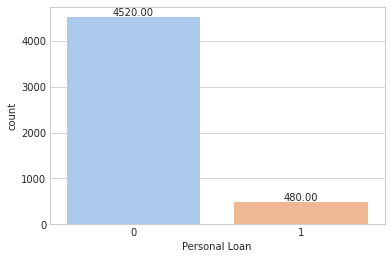

In [23]:
splot = sns.countplot(x = 'Personal Loan', data = df)

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

#### Multivariate Analysis:

In [24]:
X = df.drop('Personal Loan', axis = 1)
Y = df[['Personal Loan']]

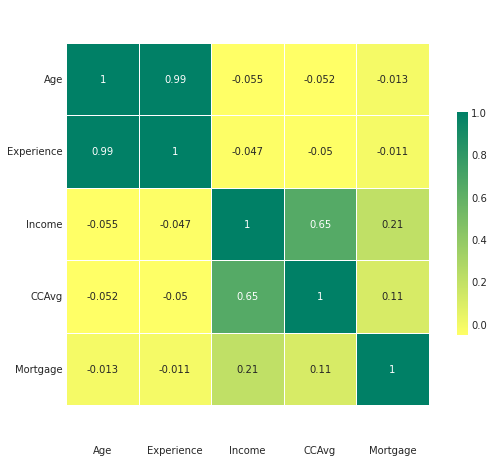

In [25]:
# Correlation & Heat maps

corr = X.corr()
plt.figure(figsize=(10, 8))
g = sns.heatmap(corr, annot=True, cmap = 'summer_r', square=True, linewidth=1, cbar_kws={'fraction' : 0.02})
g.set_yticklabels(g.get_yticklabels(), rotation=0, horizontalalignment='right')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

**Observation:** We see there is a very strong positive correlation between Age and Work Experience, which is expected.

There is also a positive correlation between Income and Credit Card spending.

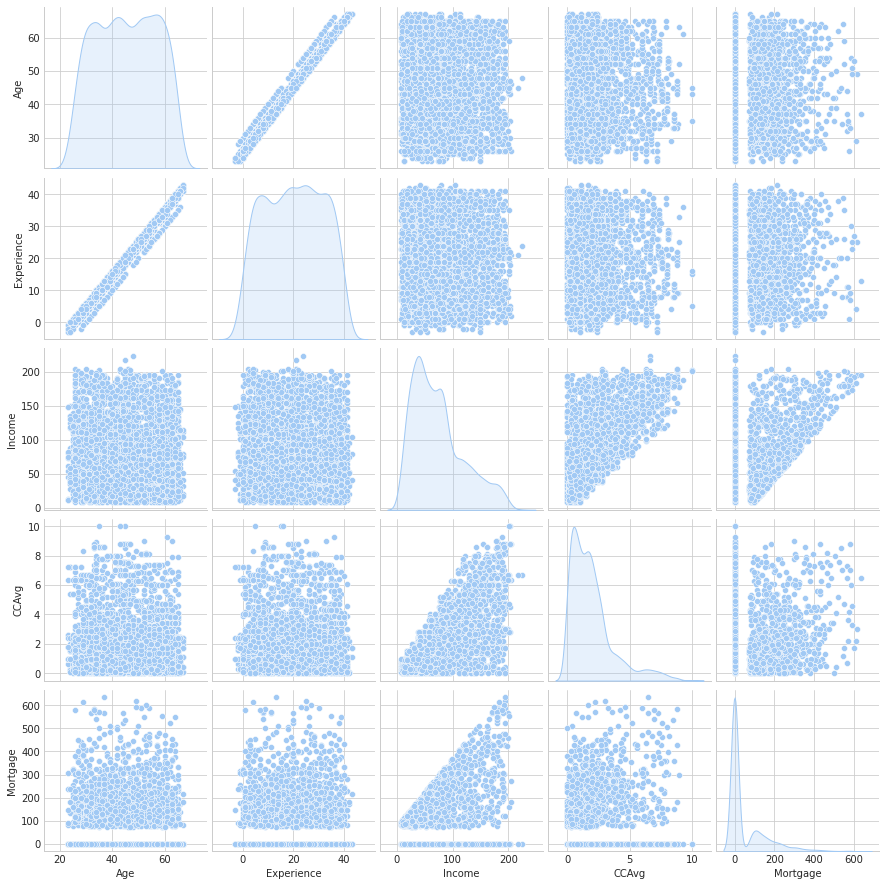

In [26]:
# Now let's plot all Dependent variables to see their inter-relations.

sns.pairplot(X, diag_kind = 'kde', vars = list(df_num.columns))

### Data Pre-processing

Firstly, we're going to create a Train and then a Test data in 80:20 ratio

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1, stratify = Y)

Since, we already know that we have already observed as we don't have any missing values, so we can quickly move ahed to the next step which is 'Feature Selection'.

#### Feature Selection

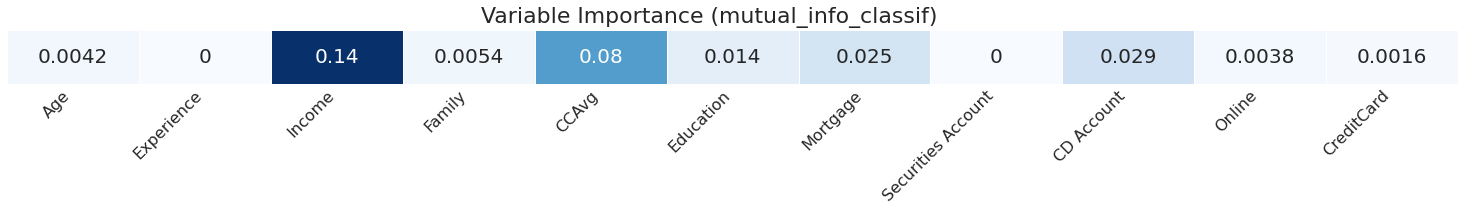

In [28]:
from sklearn.feature_selection import mutual_info_classif
mutual_information = mutual_info_classif(X_train, y_train, n_neighbors=5, copy = True)

plt.subplots(1, figsize=(26, 1))
sns.heatmap(mutual_information[:, np.newaxis].T, cmap='Blues', cbar=False, linewidths=1, annot=True, annot_kws={"size": 20})
plt.yticks([], [])
plt.gca().set_xticklabels(X_train.columns, rotation=45, ha='right', fontsize=16)
plt.suptitle("Variable Importance (mutual_info_classif)", fontsize=22, y=1.2)
plt.gcf().subplots_adjust(wspace=0.2)

Text(0.5, 0, 'Relative Importance')

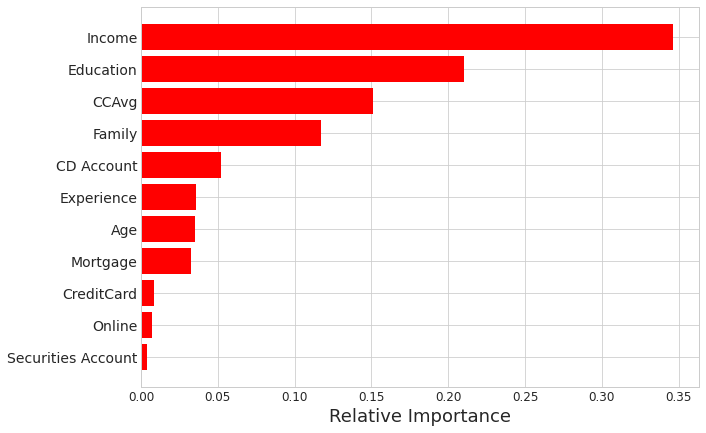

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rf_clf.fit(X_train, y_train)

features = list(X_train.columns)
importances = rf_clf.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(10, 7))
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=14)
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance', fontsize = 18)

#### Transformation Pipelines

In [30]:
# from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

X_train_num = X_train.select_dtypes(include='number')
X_train_cat = X_train.select_dtypes(include='category')

num_attribs = list(X_train_num.columns)
cat_attribs = list(X_train_cat.columns)

transformer = ColumnTransformer([
        ("num", StandardScaler(), num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

X_train = transformer.fit_transform(X_train)
print(X_train.shape)
X_train[1, :]

(4000, 20)


array([ 1.54242379,  1.64860495, -1.09229452, -0.93991736, -0.55912257,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  1.        ,  0.        ,  1.        ,
        0.        ,  1.        ,  0.        ,  1.        ,  0.        ])

#### Training Models

In [31]:
def train_model(model):
    m = model[1]
    y_train_pred = cross_val_predict(model[1], X_train, y_train, cv=5)
    cm = confusion_matrix(y_train, y_train_pred)
    print('Confusion matrix: ' + model[0])
    print(cm)
    print()
    accuracy = accuracy_score(y_train, y_train_pred)
    precision = precision_score(y_train, y_train_pred)
    recall = recall_score(y_train, y_train_pred)
    f1 = f1_score(y_train, y_train_pred)
    print(f'{model[0]} Accuracy: {accuracy}')
    print(f'{model[0]} Precision: {precision}')
    print(f'{model[0]} Recall: {recall}')
    print(f'{model[0]} f1 - score: {f1}')

In [32]:
# Training Gaussian Naive Bayes model

train_model(('Gaussian Naive Bayes', GaussianNB()))

Confusion matrix: Gaussian Naive Bayes
[[3411  205]
 [ 188  196]]

Gaussian Naive Bayes Accuracy: 0.90175
Gaussian Naive Bayes Precision: 0.48877805486284287
Gaussian Naive Bayes Recall: 0.5104166666666666
Gaussian Naive Bayes f1 - score: 0.49936305732484076


In [33]:
# Training Logistic Regression model

train_model(('Logistic Regression', LogisticRegression(solver = 'liblinear')))

Confusion matrix: Logistic Regression
[[3578   38]
 [ 124  260]]

Logistic Regression Accuracy: 0.9595
Logistic Regression Precision: 0.87248322147651
Logistic Regression Recall: 0.6770833333333334
Logistic Regression f1 - score: 0.7624633431085044


In [34]:
# Training KNN model

train_model(('k Nearest Neighbor', KNeighborsClassifier(n_neighbors = 7, weights = 'distance')))

Confusion matrix: k Nearest Neighbor
[[3611    5]
 [ 177  207]]

k Nearest Neighbor Accuracy: 0.9545
k Nearest Neighbor Precision: 0.9764150943396226
k Nearest Neighbor Recall: 0.5390625
k Nearest Neighbor f1 - score: 0.6946308724832215


In [35]:
train_model(('SVM', SVC(gamma = 'auto')))

Confusion matrix: SVM
[[3615    1]
 [  87  297]]

SVM Accuracy: 0.978
SVM Precision: 0.9966442953020134
SVM Recall: 0.7734375
SVM f1 - score: 0.8709677419354839


In [36]:
# Training Decision Tree

train_model(('CART', DecisionTreeClassifier()))

Confusion matrix: CART
[[3574   42]
 [  39  345]]

CART Accuracy: 0.97975
CART Precision: 0.8914728682170543
CART Recall: 0.8984375
CART f1 - score: 0.8949416342412452


In [37]:
# Similarly training 'Random Forest' model

train_model(('Random Forest', RandomForestClassifier(n_estimators = 100, random_state = 42)))

Confusion matrix: Random Forest
[[3608    8]
 [  46  338]]

Random Forest Accuracy: 0.9865
Random Forest Precision: 0.976878612716763
Random Forest Recall: 0.8802083333333334
Random Forest f1 - score: 0.926027397260274


#### Model Selection and Tuning

In [38]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestClassifier(random_state=42)


# train across 5 folds, that's a total of (12+6)*5=90 rounds of training

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='f1',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='f1')

In [39]:
# Finding best parameters
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [40]:
rf_clf = grid_search.best_estimator_

#### Testing the Data

In [41]:
X_test = transformer.fit_transform(X_test)
print(X_test.shape)

(1000, 20)


In [42]:
y_test = np.array(y_test)
print(y_test.shape)

(1000, 1)


In [43]:
# Fitting 

rf_clf.fit(X_test, y_test)

RandomForestClassifier(max_features=8, n_estimators=30, random_state=42)

In [44]:
y_test_predict = rf_clf.predict(X_test)

In [45]:
rf_clf.score(X_test, y_test)

1.0

In [46]:
# Print the Metrics score

print(metrics.classification_report(y_test, y_test_predict, labels = [1, 0]))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        96
           0       1.00      1.00      1.00       904

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

